# California Housing Prices - Regression
In this assignment we applied regression models to predict housing prices
### Features:
- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housing_median_age: Median age of a house within a block; a lower number is a newer building
- total_rooms: Total number of rooms within a block
- total_bedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- ocean_proximity: Location of the house w.r.t ocean/sea
### Target variable:
median_house_value: Median house value for households within a block (measured in US Dollars)
# Feature Engineering and Selection
## Prerequisite

In [40]:
# helper packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pickle
%matplotlib inline
import sklearn 
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression


## Cali dataset

In [2]:
# read california housing dataset
cali = pd.read_csv("../data/housing.csv")
# show dimensions
cali.shape

(20640, 10)

In [3]:
# show data types and other details in the dataset
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# show 20 random rows
cali.sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11525,-118.05,33.72,22.0,5416.0,1271.0,2260.0,1184.0,3.8038,174500.0,<1H OCEAN
5015,-118.32,34.00,50.0,2189.0,460.0,1097.0,469.0,2.4583,120900.0,<1H OCEAN
18391,-121.87,37.27,16.0,3298.0,451.0,1542.0,423.0,6.7064,305600.0,<1H OCEAN
13091,-121.35,38.56,16.0,2278.0,370.0,1203.0,371.0,5.0622,132400.0,INLAND
4912,-118.27,34.01,47.0,921.0,264.0,881.0,221.0,1.4327,114100.0,<1H OCEAN
8886,-118.51,34.03,37.0,4072.0,905.0,1468.0,923.0,3.8571,500001.0,<1H OCEAN
19980,-119.08,36.20,30.0,1677.0,358.0,1159.0,365.0,2.4554,61200.0,INLAND
1476,-122.04,37.96,16.0,2913.0,723.0,1705.0,693.0,2.9097,106300.0,NEAR BAY
12766,-121.42,38.62,33.0,3171.0,832.0,1591.0,695.0,2.0786,88600.0,INLAND
14294,-117.13,32.72,43.0,2160.0,504.0,1221.0,452.0,2.4821,140600.0,NEAR OCEAN


In [5]:
# how many null values do we have
cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# how many duplicated rows do we have
cali.duplicated().sum()

0

In [7]:
# statistical description of the dataset
cali.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# correlation between features
cali.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

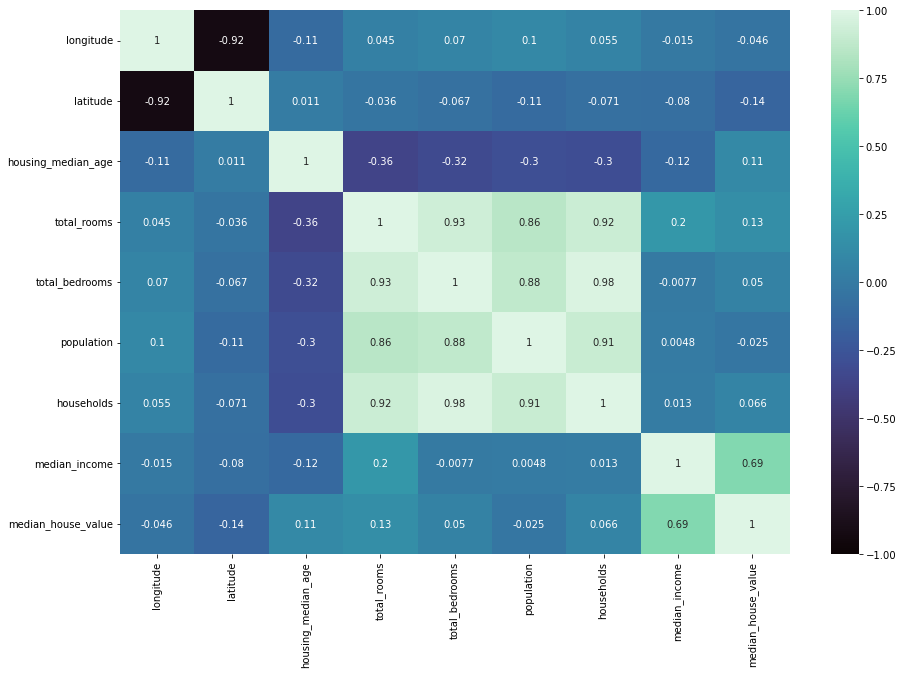

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(cali.corr(),cmap='mako', annot=True, vmin=-1, vmax=1)

## Check for non-informative predictors
### Feature variance
After testing for feature variace, we could see that there were no constant features, so none were deleted

In [10]:
X = cali.drop('median_house_value',axis = 1)
# remove low variance features
var_thres = VarianceThreshold(threshold=0)
# exception for categorical features
var_thres.fit(X.drop("ocean_proximity", axis=1))
# shows which column is non constant (True)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Check for imbalanced distributions
Check for factor variable where some levels are very common while others very rare. After using value counts on ocean proximity feature, we can see that 'NEAR OCEAN', 'NEAR BAY' and 'ISLAND' have way lower value counts, in this case we can use Lumping to group them together into one category called 'OTHER'

In [11]:
# before lumping
cali["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
# replace values 'near ocean' 'near bay' and 'island' with 'other'
cali["ocean_proximity"] = cali["ocean_proximity"].replace(['NEAR OCEAN', 'NEAR BAY', 'ISLAND'], 'OTHER')

In [13]:
# after lumping
cali["ocean_proximity"].value_counts()

<1H OCEAN    9136
INLAND       6551
OTHER        4953
Name: ocean_proximity, dtype: int64

In [14]:
# features
cali2 = cali.dropna()
features = cali2.drop("median_house_value", axis=1)
features = pd.get_dummies(data=features ,drop_first=True)


In [15]:
# target variable
target = cali2["median_house_value"]


In [16]:
model = sm.OLS(target,features)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          2.148e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                        0.00
Time:                        03:12:21   Log-Likelihood:                     -2.5689e+05
No. Observations:               20433   AIC:                                  5.138e+05
Df Residuals:                   20423   BIC:                                  5.139e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
longitude               -832.4694    108.194     -7.694      0.000   -1044.539    -620.400
latitude               -2006.4645    358.566     -5.596      0.000   -2709.282   -1303.647
housing_median_age      1138.2147     43.786     25.995      0.000    1052.391    1224.038
total_rooms               -7.0507      0.804     -8.770      0.000      -8.627      -5.475
total_bedrooms            79.1725      6.930     11.425      0.000      65.590      92.755
population               -37.5053      1.094    -34.276      0.000     -39.650     -35.360
households                76.9152      7.493     10.266      0.000      62.229      91.601
median_income           4.016e+04    341.045    117.747      0.000    3.95e+04    4.08e+04
ocean_proximity_INLAND -6.524e+04   1411.194    -46.228      0.000    -6.8e+04   -6.25e+04
ocean_proximity_OTHER   1.091e+04   1311.875      8.316      0.000    8338.268    1.35e+04
==============================================================================
Omnibus:                     4884.909   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17247.520
Skew:                           1.180   Prob(JB):                         0.00
Kurtosis:                       6.832   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check for missingness

Reason for missingness: 
from the mask it seems that values are missing at random.

<AxesSubplot:>

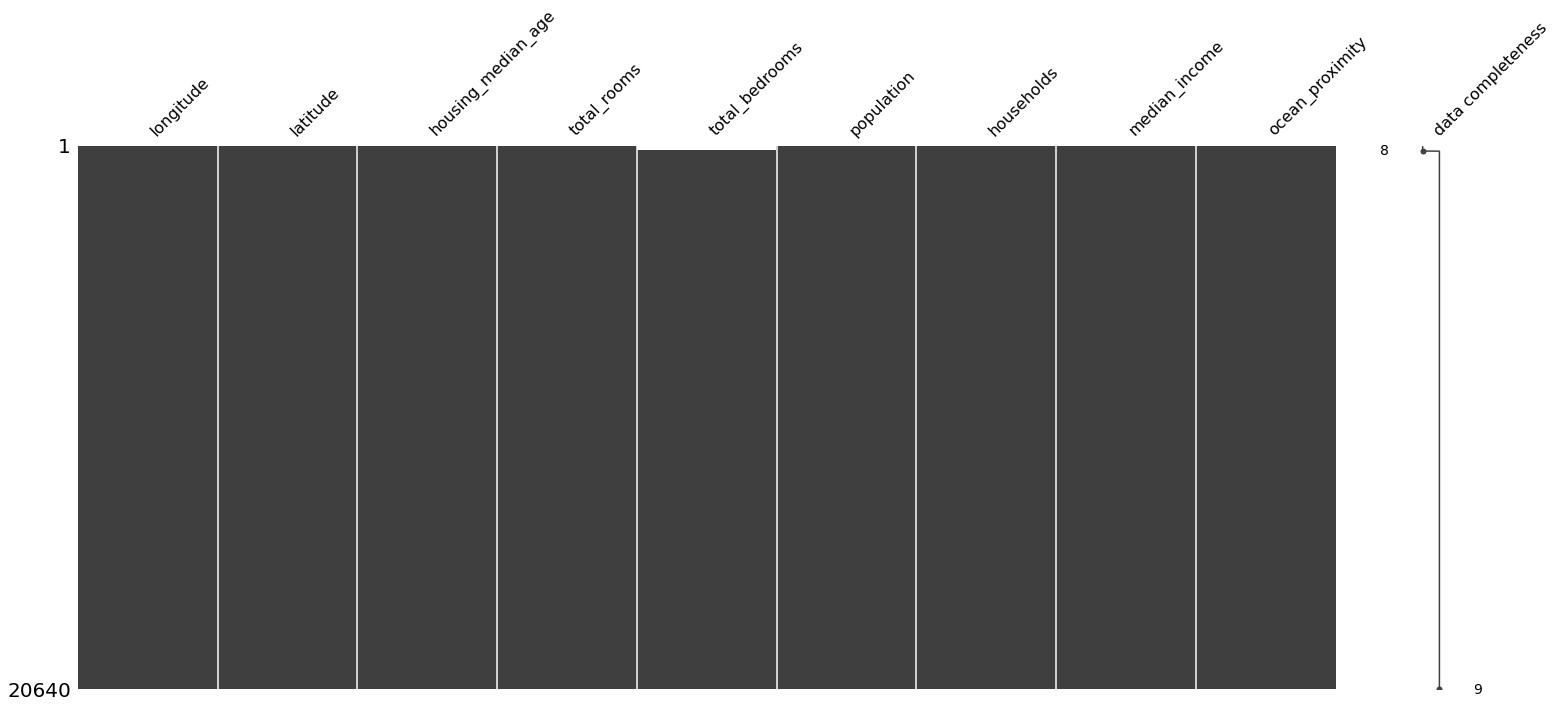

In [17]:
msno.matrix(X, labels=True, filter="bottom", sort="ascending", n=50)

In [18]:
cali[cali['total_bedrooms'].isna()].sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19833,-119.38,36.53,38.0,1281.0,NaN,1423.0,293.0,1.9602,51400.0,INLAND
18246,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036,340000.0,OTHER
15607,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,240600.0,<1H OCEAN
19559,-120.98,37.60,36.0,1437.0,NaN,1073.0,320.0,2.1779,58400.0,INLAND
14970,-117.01,32.74,31.0,3473.0,NaN,2098.0,677.0,2.6973,135200.0,<1H OCEAN
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,OTHER
14386,-117.23,32.75,5.0,1824.0,NaN,892.0,426.0,3.4286,137500.0,OTHER
4309,-118.32,34.09,44.0,2666.0,NaN,2297.0,726.0,1.6760,208800.0,<1H OCEAN
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,<1H OCEAN
11351,-117.91,33.76,20.0,4413.0,NaN,4818.0,1063.0,2.8594,215100.0,<1H OCEAN


In [19]:
# we drop all missing values
cali = cali.dropna()

## Check for extreme values
### outlier detection
Note that extreme value detection and removal only applies to numerical features. To do it we first plot a boxplot of some feature, if we notice it has outliers we run the outlier removal function

<AxesSubplot:>

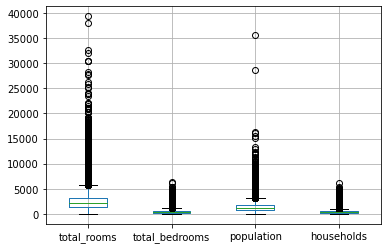

In [20]:
cali.boxplot(["total_rooms", "total_bedrooms", "population", "households"])

<AxesSubplot:xlabel='median_income'>

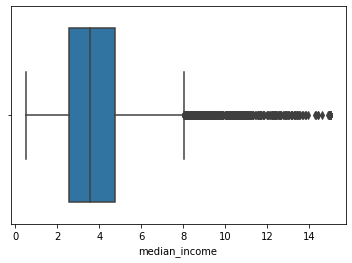

In [21]:
sns.boxplot(x=cali["median_income"])

### outlier removal

In [22]:
for x in ['median_income']:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [23]:
for x in ["total_rooms"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [24]:
for x in ["total_bedrooms"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [25]:
for x in ["population"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [26]:
for x in ["households"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [27]:
# null values increase since we replaced outliers with NAs
cali.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
median_house_value       0
ocean_proximity          0
dtype: int64

In [28]:
# now we drop them
cali = cali.dropna(axis = 0)

<AxesSubplot:>

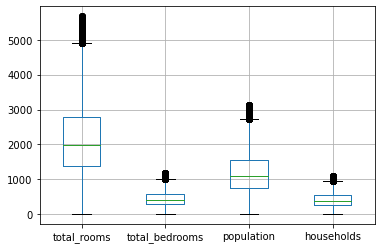

In [29]:
# boxplot after dropping extreme values
cali.boxplot(["total_rooms", "total_bedrooms", "population", "households"])

## Check for skewness

from the following plot we can see there is right skew for the features which we'll then perform log transformation on
- total_rooms 
- total_bedrooms
- population
- households
- median_income

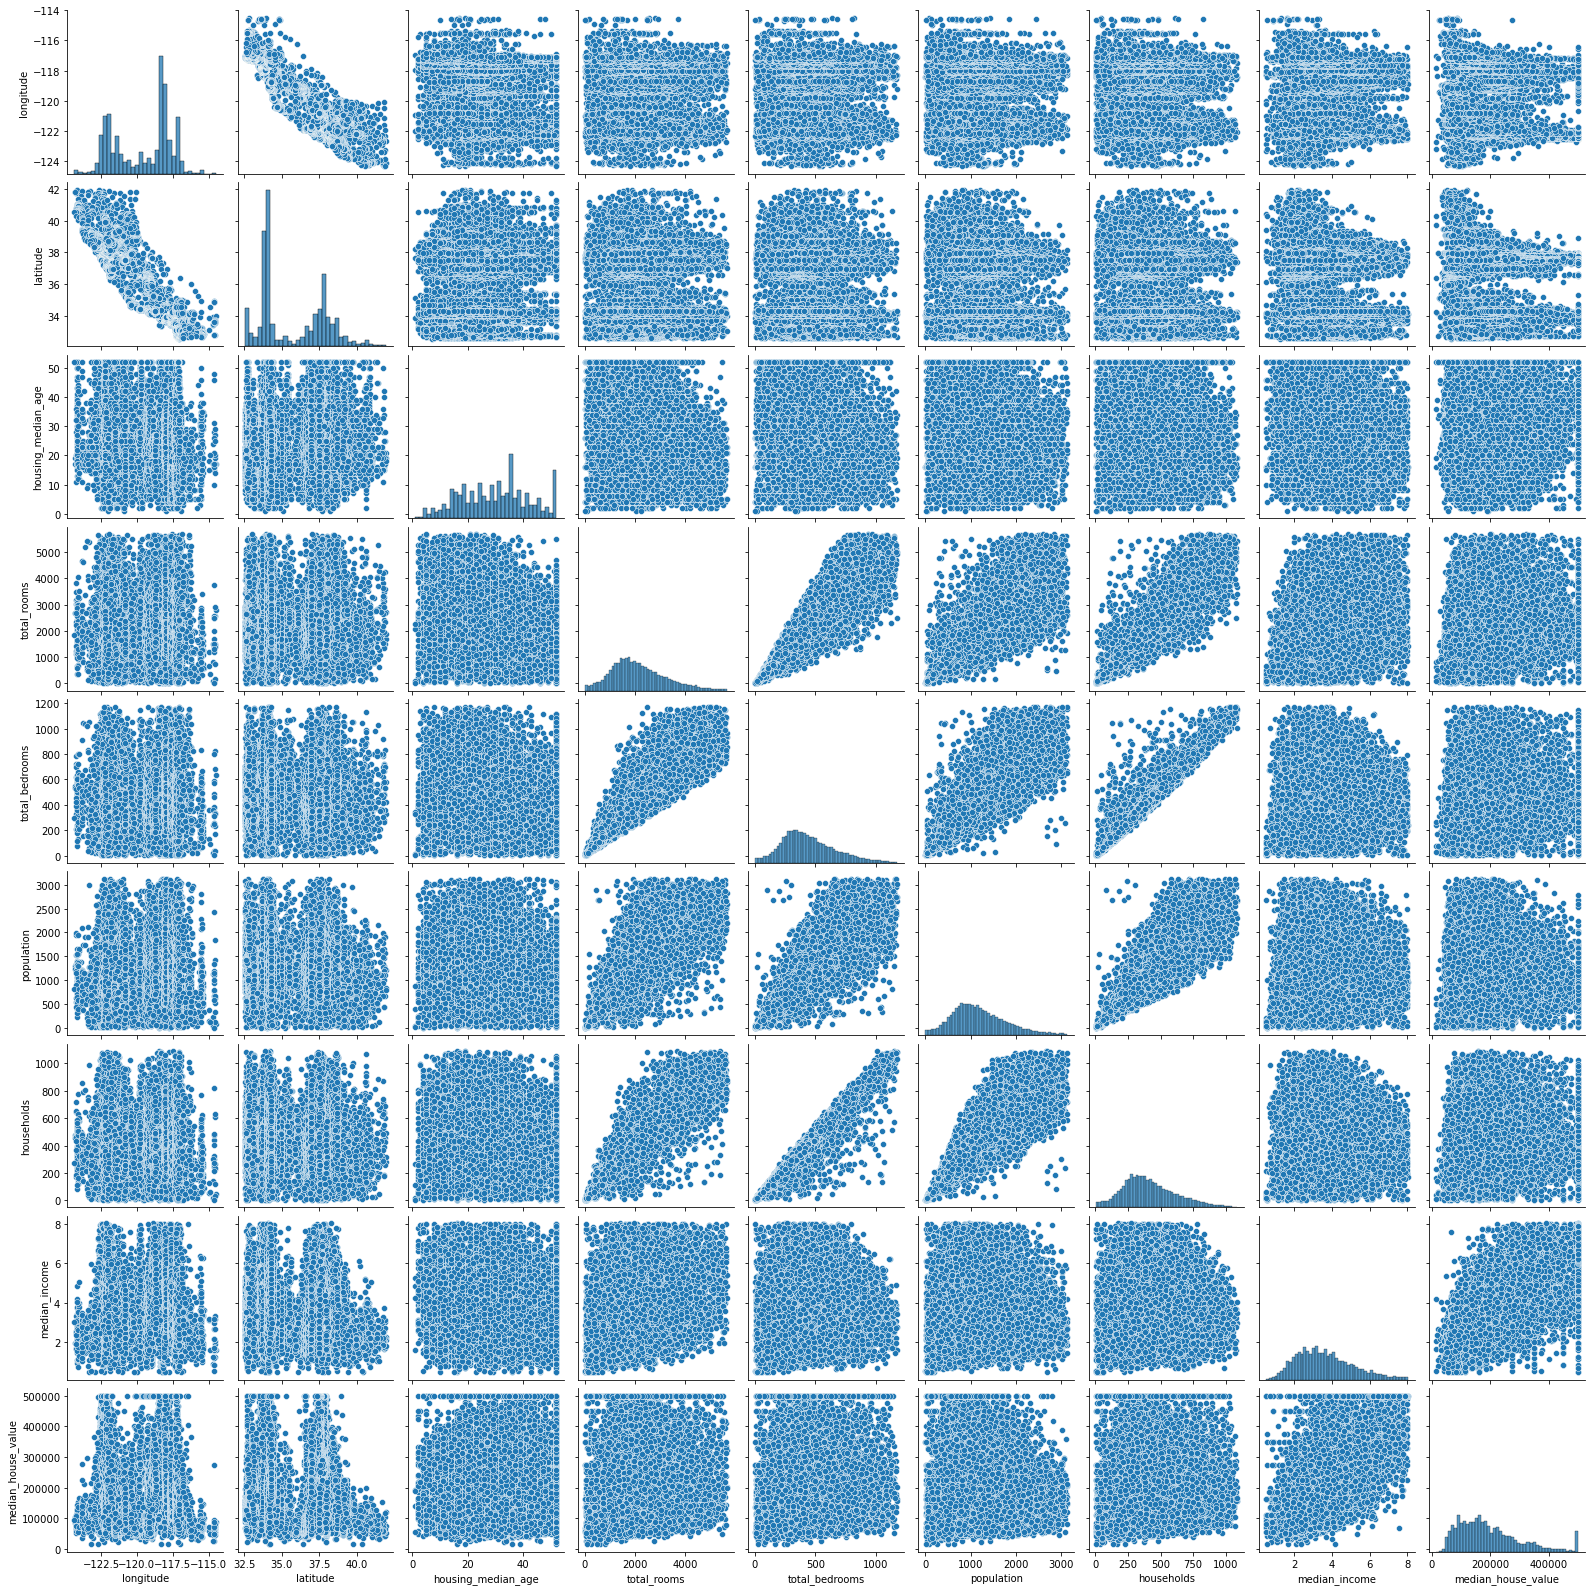

In [30]:
sns.pairplot(cali, plot_kws=dict());

In [31]:
# log transformation
cali['total_rooms']= np.sqrt(cali.total_rooms)
cali['total_bedrooms']= np.sqrt(cali.total_bedrooms)
cali['population']= np.sqrt(cali.population)
cali['households']= np.sqrt(cali.households)
cali['median_house_value']= np.sqrt(cali.median_house_value)

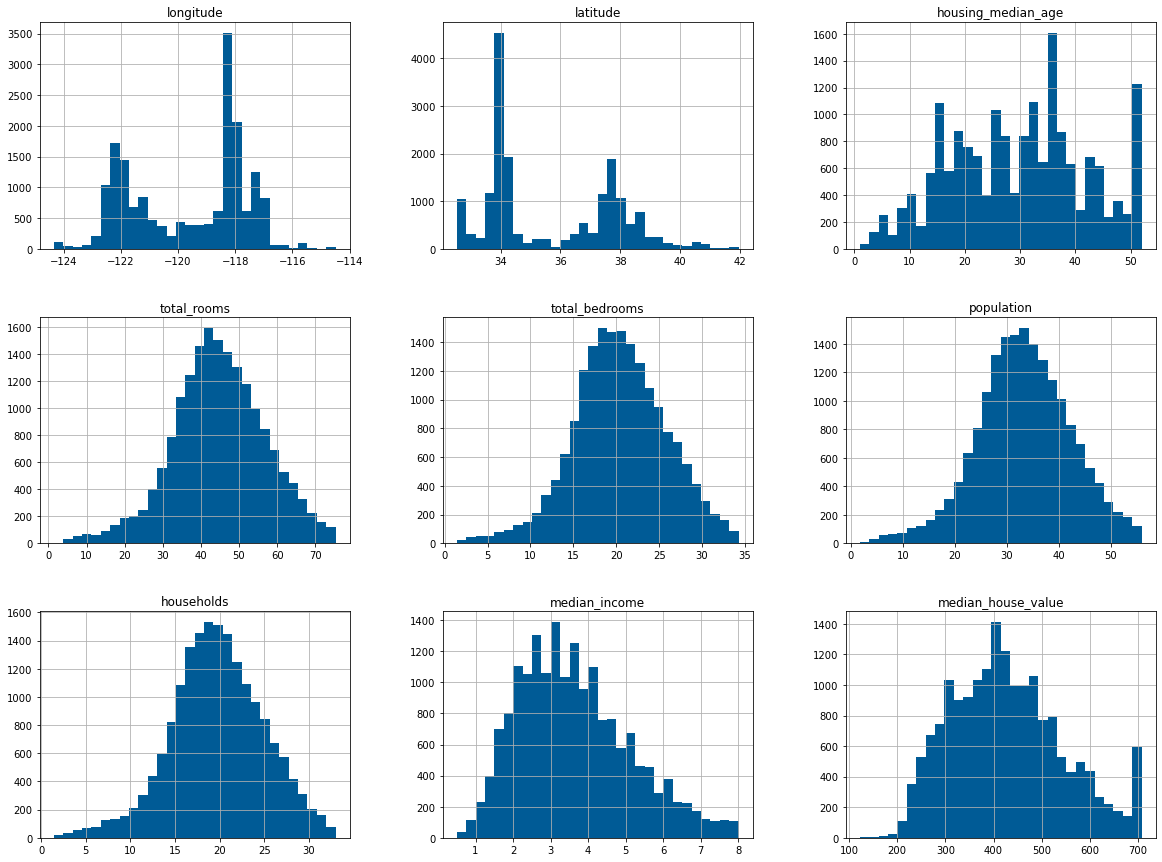

In [32]:
cali.hist(bins = 30, figsize=(20, 15), color = '#005b96');

In [33]:

features = cali.drop("median_house_value", axis=1)
features = pd.get_dummies(data=features ,drop_first=True)
target = cali["median_house_value"]


In [34]:
model = sm.OLS(target,features)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          7.407e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                        0.00
Time:                        03:13:14   Log-Likelihood:                     -1.0154e+05
No. Observations:               17994   AIC:                                  2.031e+05
Df Residuals:                   17984   BIC:                                  2.032e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
longitude                 -3.3673      0.120    -28.146      0.000      -3.602      -3.133
latitude                  -5.2688      0.379    -13.919      0.000      -6.011      -4.527
housing_median_age         1.1075      0.046     24.174      0.000       1.018       1.197
total_rooms               -3.1268      0.160    -19.543      0.000      -3.440      -2.813
total_bedrooms            10.8581      0.496     21.877      0.000       9.885      11.831
population                -6.0049      0.131    -45.956      0.000      -6.261      -5.749
households                 6.6374      0.489     13.576      0.000       5.679       7.596
median_income             52.4915      0.557     94.238      0.000      51.400      53.583
ocean_proximity_INLAND   -73.1113      1.525    -47.933      0.000     -76.101     -70.122
ocean_proximity_OTHER      2.1711      1.381      1.572      0.116      -0.536       4.878
==============================================================================
Omnibus:                     2366.622   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6171.857
Skew:                           0.740   Prob(JB):                         0.00
Kurtosis:                       5.458   Cond. No.                         493.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check for redundant features
perform ANOVA test

In [35]:
cali = pd.get_dummies(data=cali,drop_first=True)
# divide features and target
features = cali.drop(['median_house_value'], axis=1)
target = cali["median_house_value"]

# anova test
anova_test = SelectKBest(f_regression, k=6)
anova_test.fit(features, target)

# show results                    
for i in anova_test.get_support(indices=True):
    print(cali.columns[i])

latitude
housing_median_age
total_rooms
median_income
median_house_value
ocean_proximity_INLAND


Mutual information

In [36]:
mutual_information = SelectKBest(mutual_info_regression, k=6)
mutual_information.fit(features, target)

for i in mutual_information.get_support(indices=True):
    print(cali.columns[i])

longitude
latitude
housing_median_age
median_income
median_house_value
ocean_proximity_INLAND


## Dimension reduction
Using PCA

In [37]:
pca = PCA(n_components=0.99, svd_solver='auto')
pca.fit(features)
PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.99)

## Dummy encoding

In [38]:
# encode categorical variables as numeric using dummy encoding
cali = pd.get_dummies(data=cali,drop_first=True)

In [39]:
cali

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_OTHER
2,-122.24,37.85,52.0,38.301436,13.784049,22.271057,13.304135,7.2574,593.380148,0,1
3,-122.25,37.85,52.0,35.693137,15.329710,23.622024,14.798649,5.6431,584.208867,0,1
4,-122.25,37.85,52.0,40.336088,16.733201,23.769729,16.093477,3.8462,584.978632,0,1
5,-122.25,37.85,52.0,30.315013,14.594520,20.322401,13.892444,4.0368,519.326487,0,1
6,-122.25,37.84,52.0,50.348784,22.113344,33.075671,22.671568,3.6591,546.991773,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,40.804412,19.339080,29.068884,18.165902,1.5603,279.463772,1,0
20636,-121.21,39.49,18.0,26.400758,12.247449,18.867962,10.677078,2.5568,277.668868,1,0
20637,-121.22,39.43,17.0,47.476310,22.022716,31.733263,20.808652,1.7000,303.809151,1,0
20638,-121.32,39.43,18.0,43.127717,20.223748,27.221315,18.681542,1.8672,291.032644,1,0


Save cleaned Data

In [41]:

cali.to_pickle("../data/main_data.pkl")